<a href="https://colab.research.google.com/github/EunSu0/github/blob/main/mnist_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 텐서플로 라이브러리의 버전 확인
%tensorflow_version

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# 케라스 라이브러리 불러오기
import keras

# 숫자 인식 인공지능 만들기

In [3]:
!pip install tensorflow keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# mnist에서 데이터 불러오기
(x_train, y_train), (x_test, y_test) =mnist.load_data()
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000, 28, 28)


In [6]:
# 28 * 28 => 784
# 정규화하기 위해 자료형을 실수형으로 바꾸기
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("X Training matrix shape", X_train.shape)
print("X Training matrix shape", X_test.shape)

X Training matrix shape (60000, 784)
X Training matrix shape (10000, 784)


In [7]:
# one-hot incoding
# to_categorical => 수치형 데이터를 범주형 데이터로 만들어 주는 함수
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)

Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)


In [8]:
# 인공지능 모델 설계하기
# 첫번째 은닉층 512, 두번째 은닉층 256, 출력층 10
# 최종값은 소프트맥스 함수 사용
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trai

In [9]:
# 모델 학습시키기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.2299 - accuracy: 0.9319
Epoch 2/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0853 - accuracy: 0.9737
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0532 - accuracy: 0.9834
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0360 - accuracy: 0.9883
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0274 - accuracy: 0.9917
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0209 - accuracy: 0.9935
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0180 - accuracy: 0.9941
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0135 - accuracy: 0.9957
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0174 - accuracy: 0.9939
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0151 - accuracy: 0.9

In [10]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9824
Test score: 0.06797222048044205
Test accuracy: 0.9824000000953674


In [11]:
predicted_classes = np.argmax(model.predict(X_test), axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 1s 2ms/step


<ipython-input-12-c42385f4018e>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


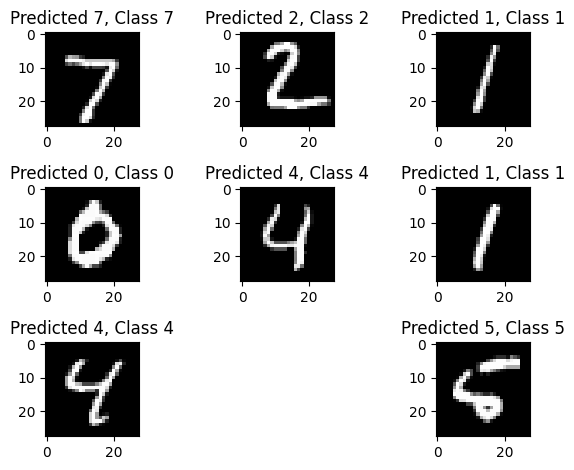

In [12]:
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  correct = correct_indices[i]
  plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
  plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
  plt.tight_layout()

<ipython-input-13-45260d682268>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


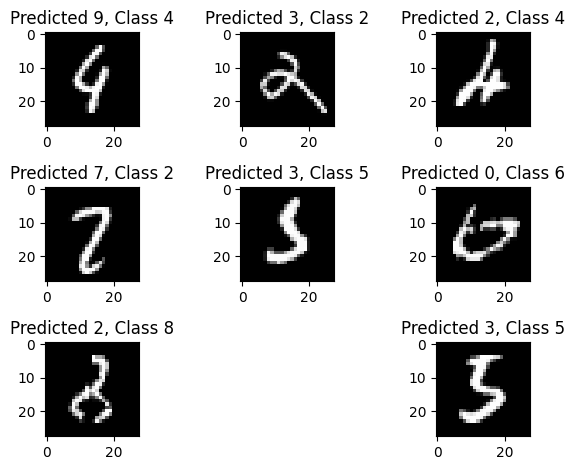

In [13]:
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  incorrect = incorrect_indices[i]
  plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
  plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
  plt.tight_layout()